# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 05.11.2020

Мягкий дедлайн: 01:59MSK 18.11.2019

Жесткий дедлайн: 01:59MSK 22.11.2019

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/21899 нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

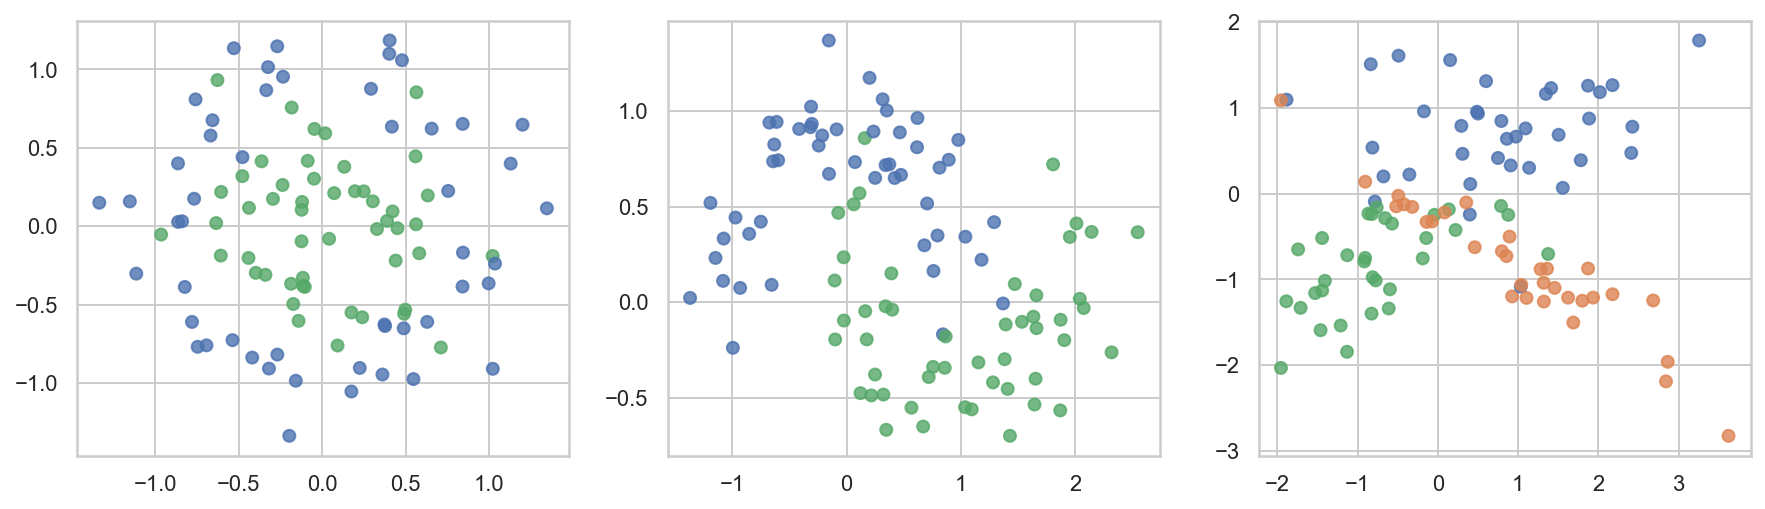

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=1.2, w_pad=0.8, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

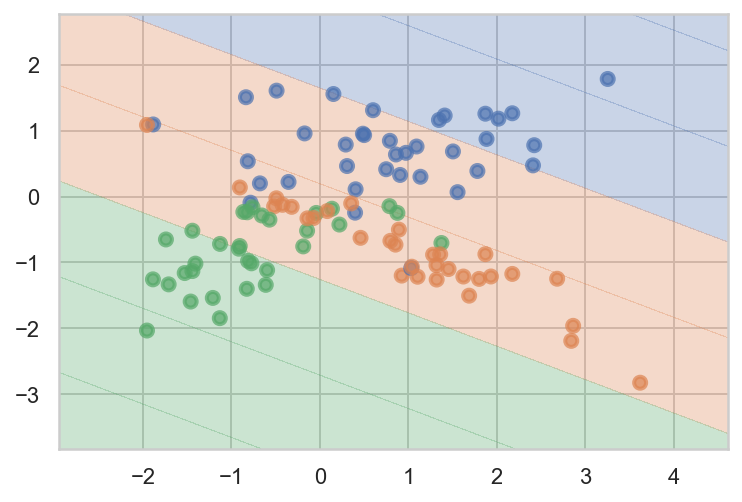

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Accuracy on the 1 dataset = 0.76
Accuracy on the 2 dataset = 0.92
Accuracy on the 3 dataset = 0.72


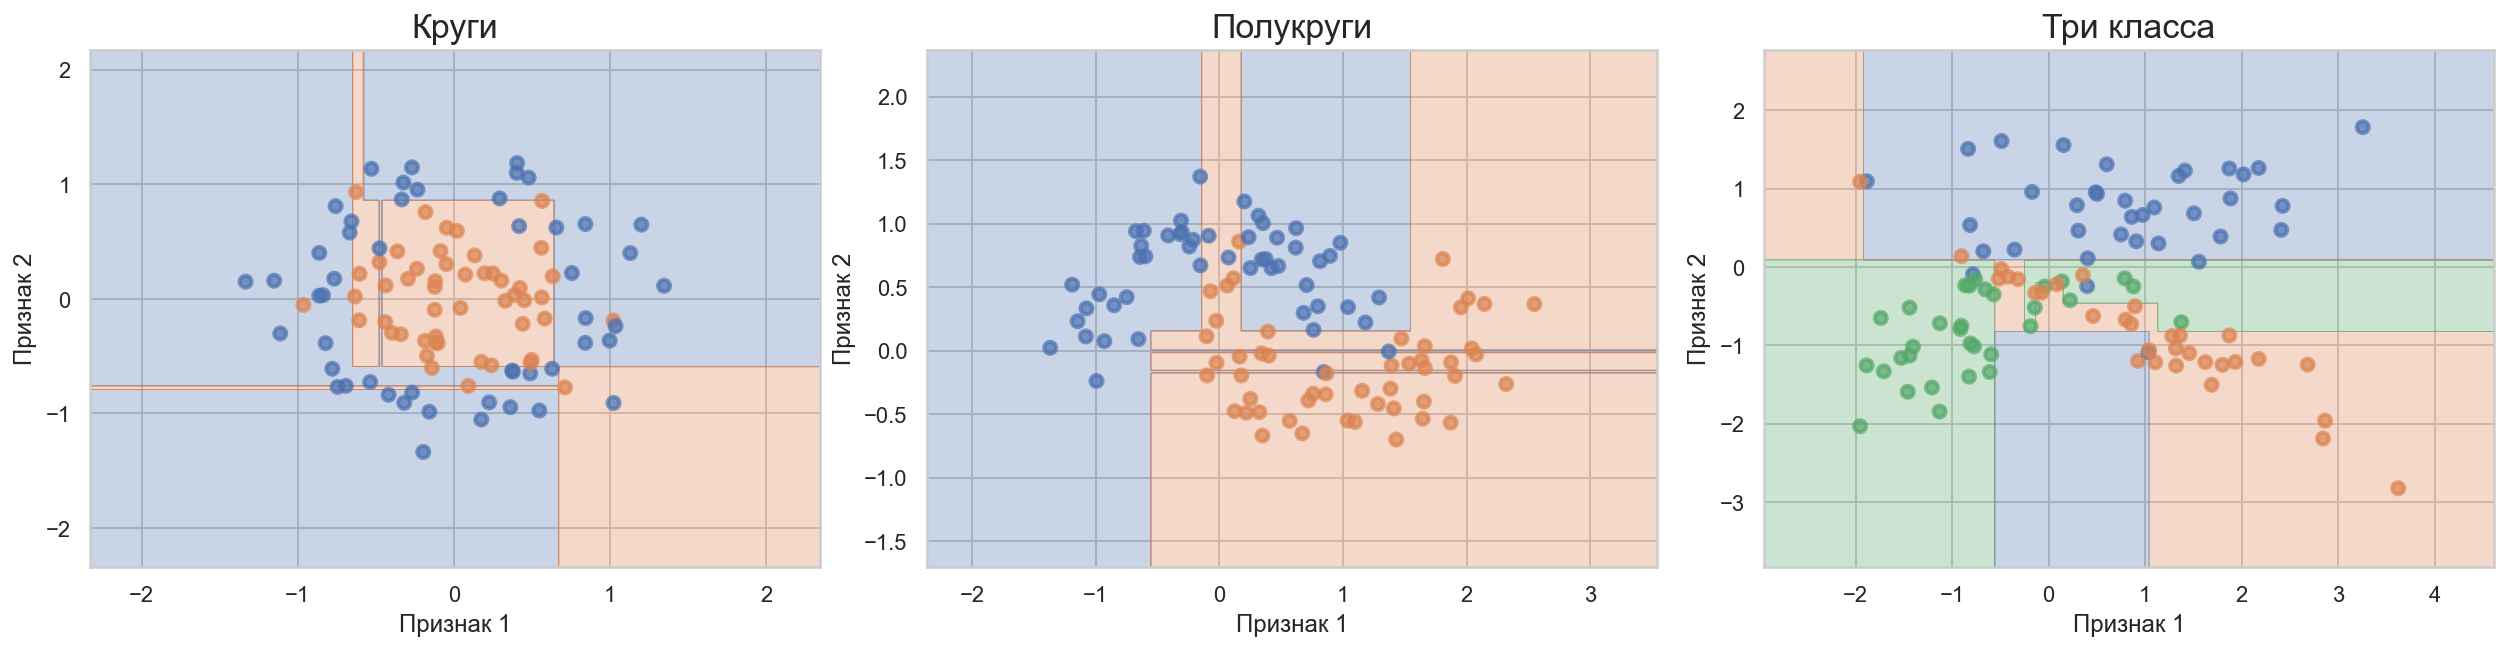

In [7]:
model = DecisionTreeClassifier()
plt.figure(figsize=(18, 5))

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # test_size=0.25 по дефолту
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print(f'Accuracy on the {i + 1} dataset =', model.score(X_test, y_test))
    
    plt.subplot(1, 3, i + 1)
    plt.title(['Круги', 'Полукруги', 'Три класса'][i], fontsize=17)
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plot_surface(model, X, y)

<div class="alert alert-block alert-info">
<b>Ответ:</b> Все модели переобучились в той или иной мере.
    
На первом датасете очевидно у нас три лишние оранжевые области. Тоже переобучились.

Модель на втором датасете: у нас есть две синие "полоски" для двух синих объектов. Хотя accuracy говорит о том, что в целом все в порядке. Видимо площадь синих полосок достаточно мала, чтобы не портить общую картину
    
На третьем датасете, на мой взгляд, проблема только в центре и маленьком зеленом участке. </div>

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Датасет 1: круги


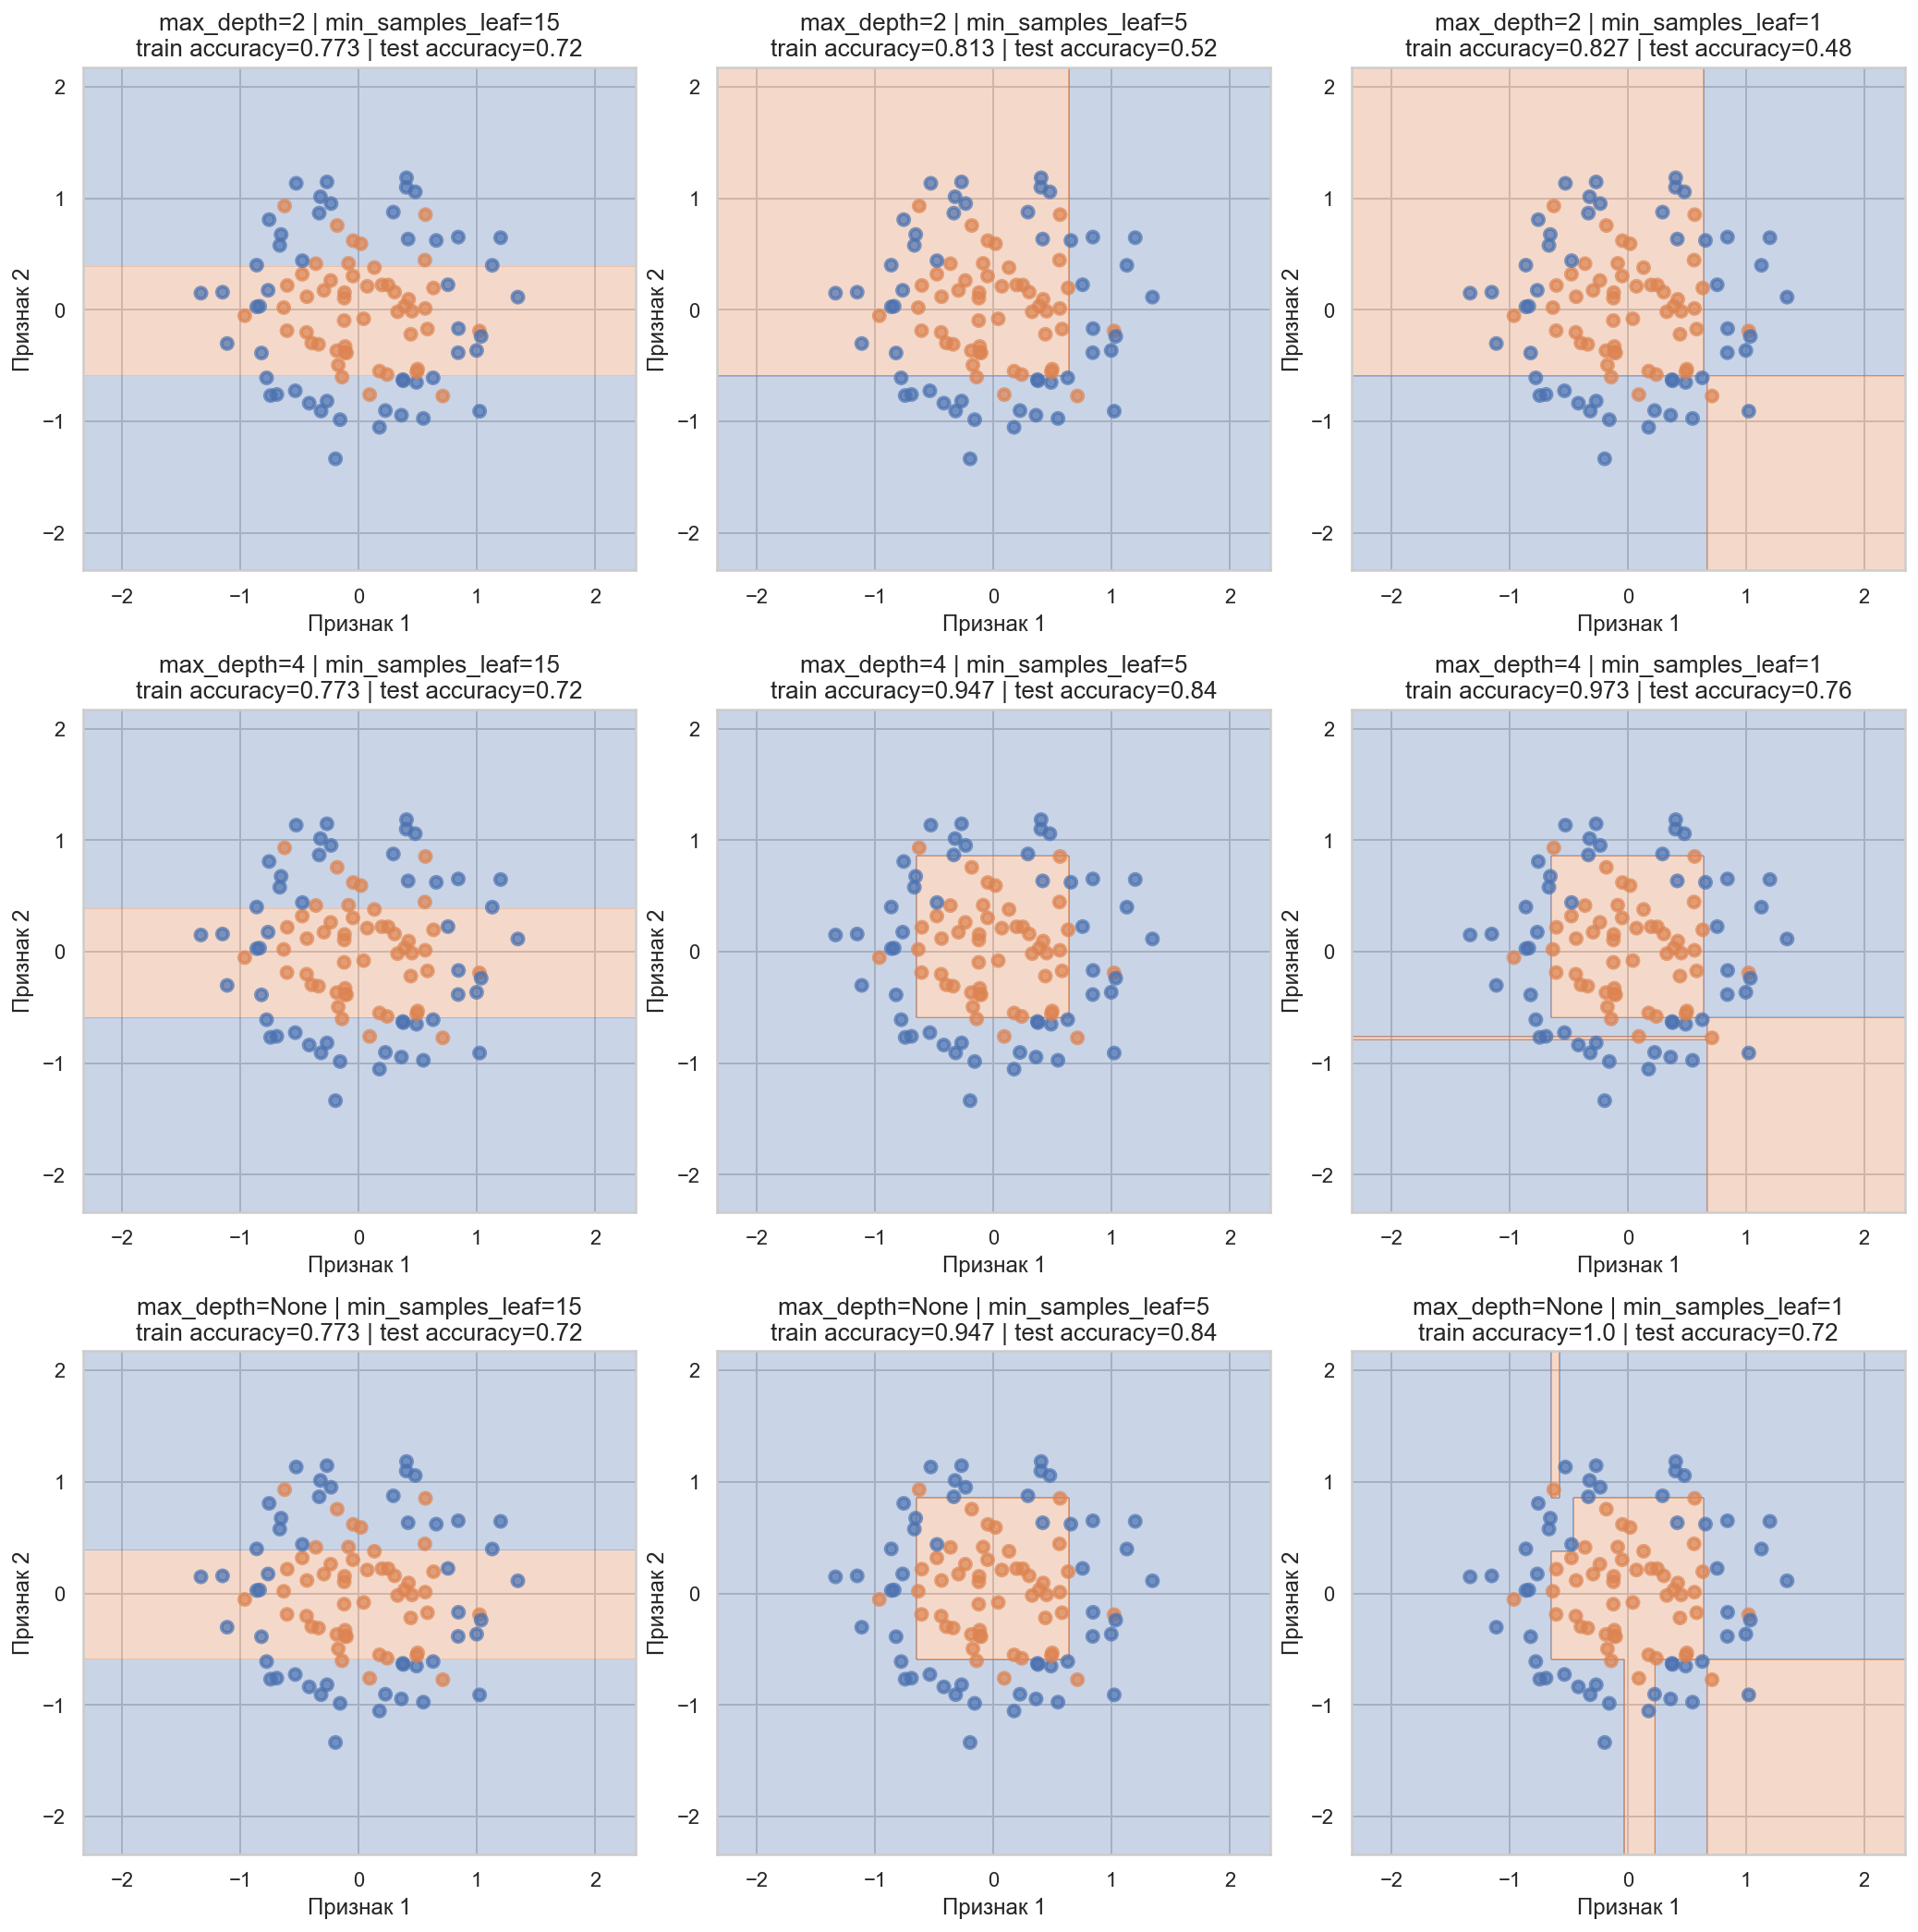

In [8]:
# код взят из семинара

print('Датасет 1: круги')
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # test_size=0.25 по дефолту

plt.figure(figsize=(15, 15))

for i, max_depth in enumerate([2, 4, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        test_accuracy = model.score(X_test, y_test)
        train_accuracy = model.score(X_train, y_train)
        
        plt.subplot(3, 3, i * 3 + j + 1)
        plot_surface(model, X, y)
        plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf)
                  + '\ntrain accuracy=' + str(round(train_accuracy, 3))
                  + ' | test accuracy=' + str(round(test_accuracy, 3)), fontsize=13)
        
        plt.xlabel('Признак 1')
        plt.ylabel('Признак 2')

<div class="alert alert-block alert-info">
<b>Круги</b>
    
С увеличением <b>max_depth</b> ничего не происходит, если довольно высокое (15) ограничение на минимальное количество объектов в листе. 4 – оптимальная глубина.
    
С уменьшением <b>min_samples_leaf</b> качество предсказаний модели сначала растет, а на единице наступает переобучение.
</div>

Датасет 2: полукруг


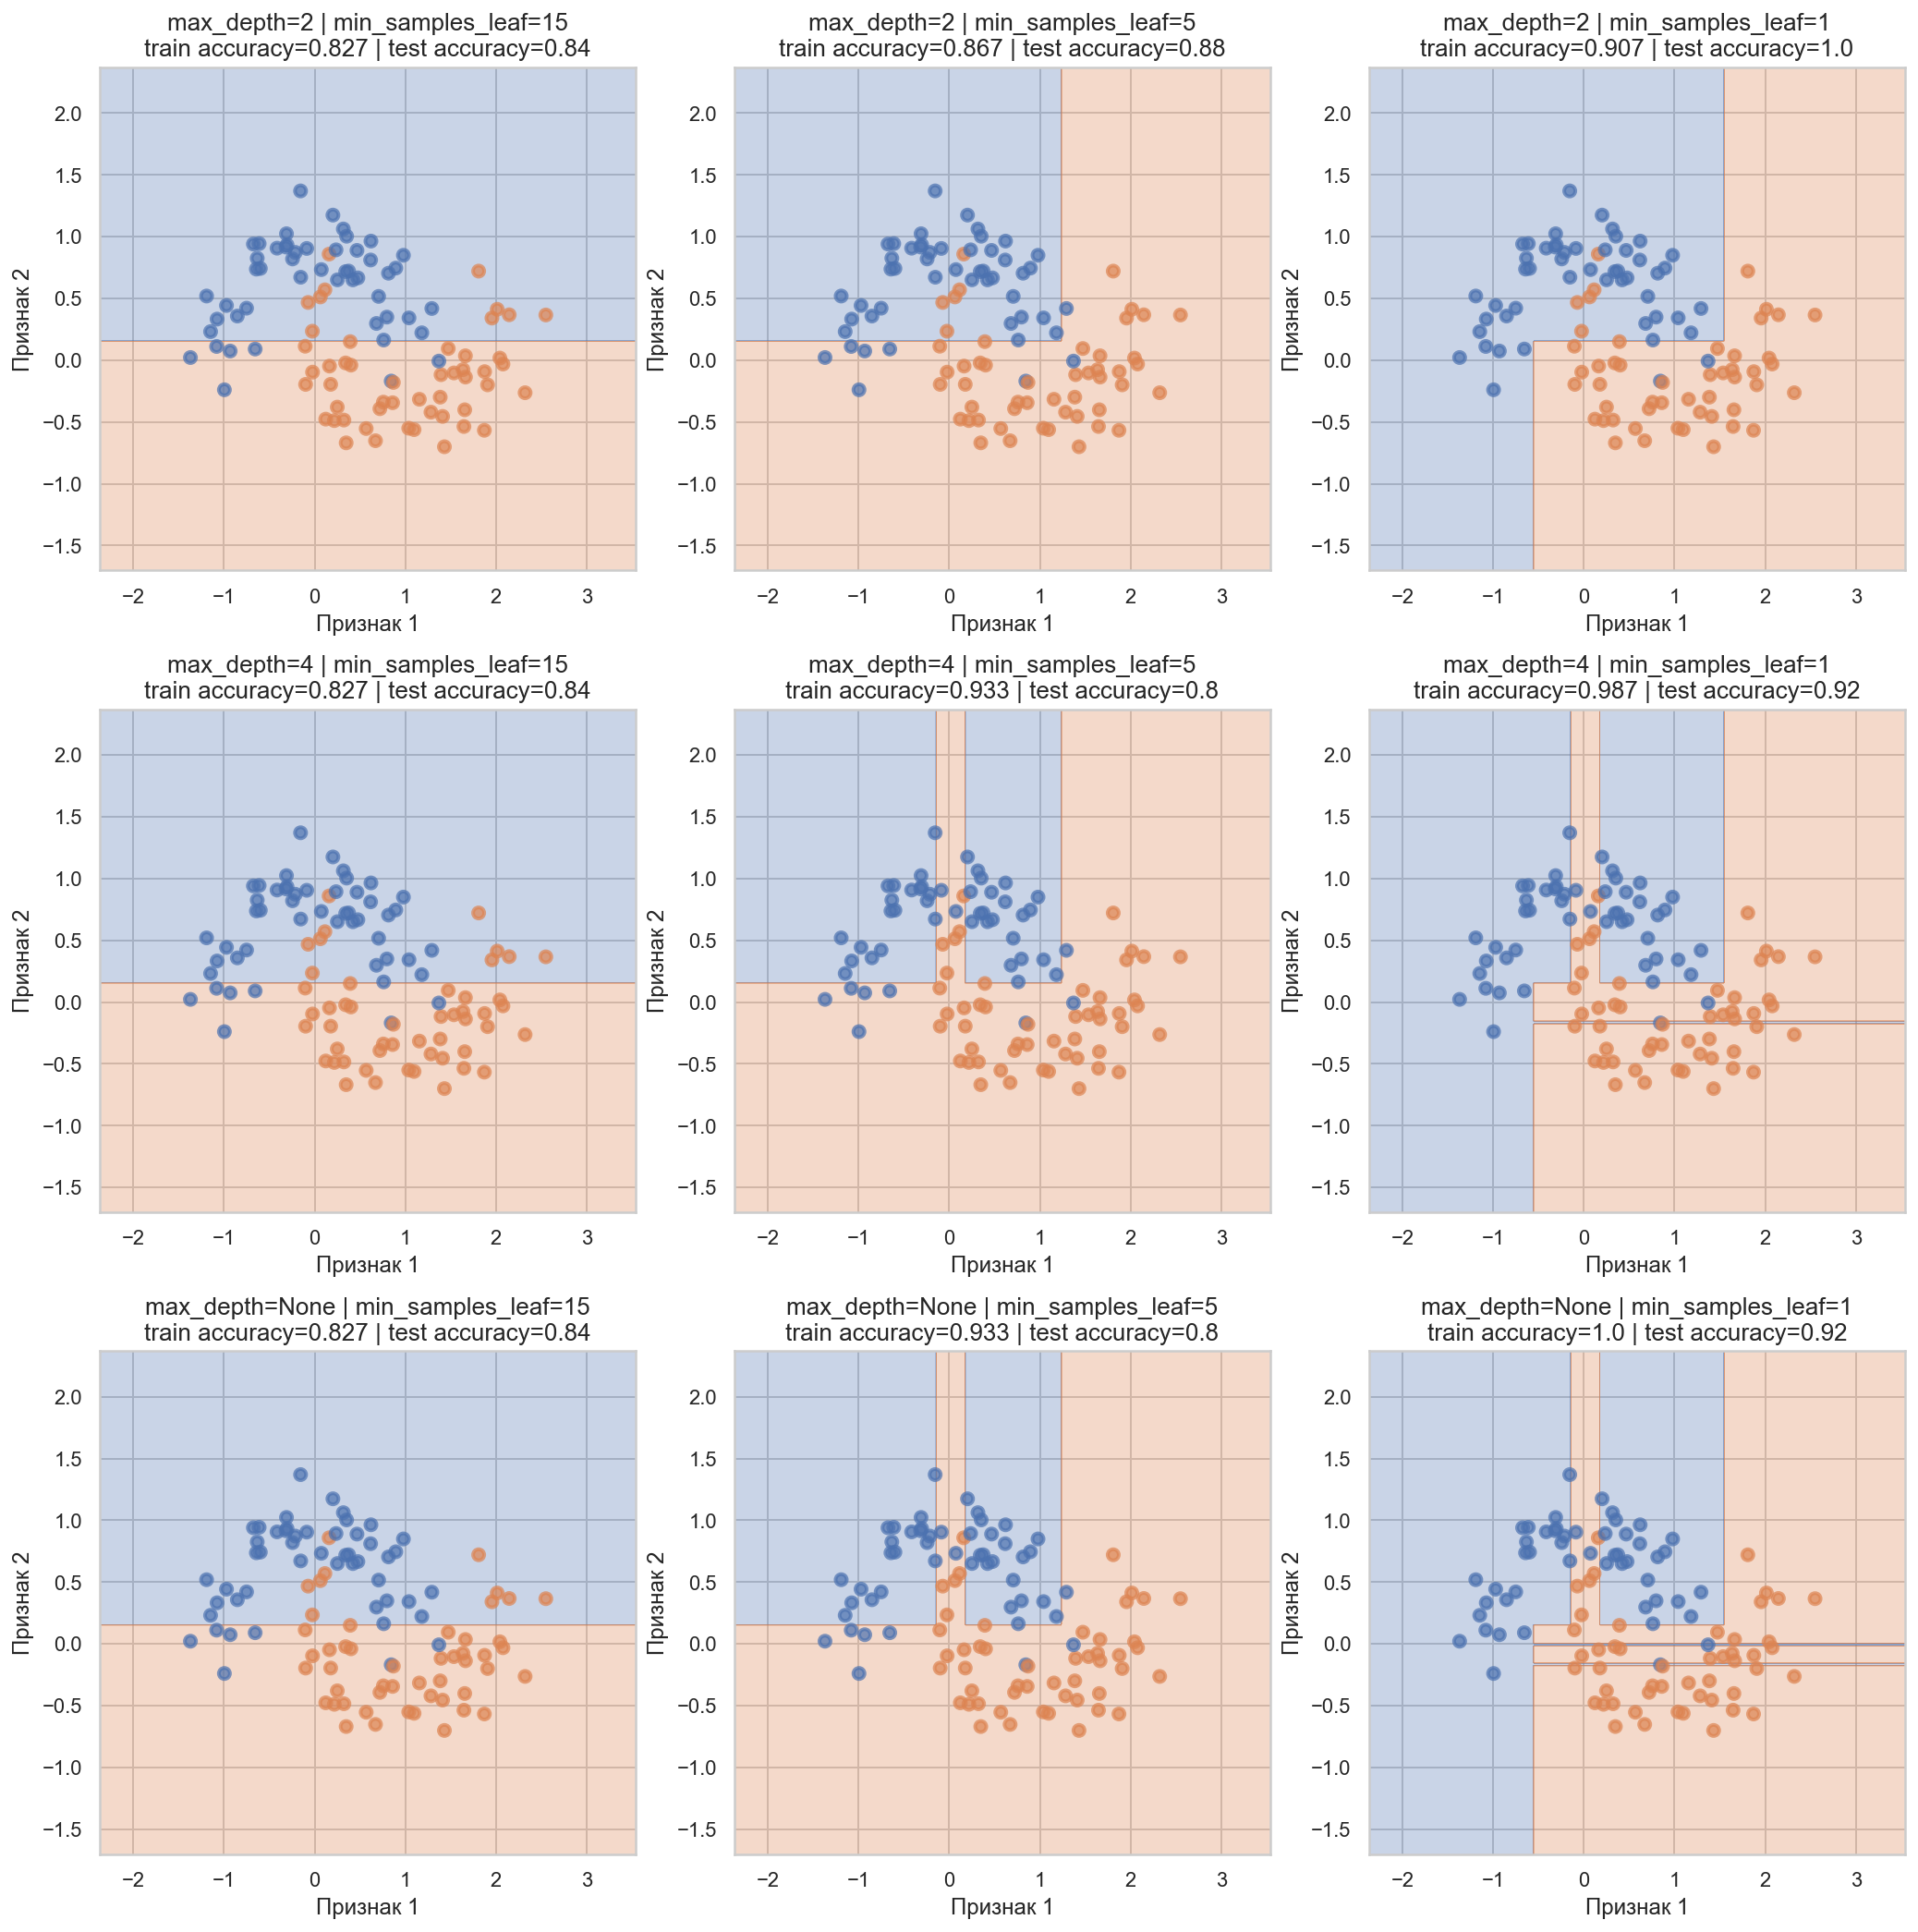

In [9]:
print('Датасет 2: полукруг')
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # test_size=0.25 по дефолту

plt.figure(figsize=(15, 15))

for i, max_depth in enumerate([2, 4, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        test_accuracy = model.score(X_test, y_test)
        train_accuracy = model.score(X_train, y_train)
        
        plt.subplot(3, 3, i * 3 + j + 1)
        plot_surface(model, X, y)
        plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf)
                  + '\ntrain accuracy=' + str(round(train_accuracy, 3))
                  + ' | test accuracy=' + str(round(test_accuracy, 3)), fontsize=13)
        
        plt.xlabel('Признак 1')
        plt.ylabel('Признак 2')

<div class="alert alert-block alert-info">
<b>Два полукруга</b>
    
С увеличением <b>max_depth</b> заметны улучшения при мягких ограничениях на min_samples_leaf.
    
С уменьшением <b>min_samples_leaf</b> модель только улучшается.
</div>

Датасет 3: 3 класса


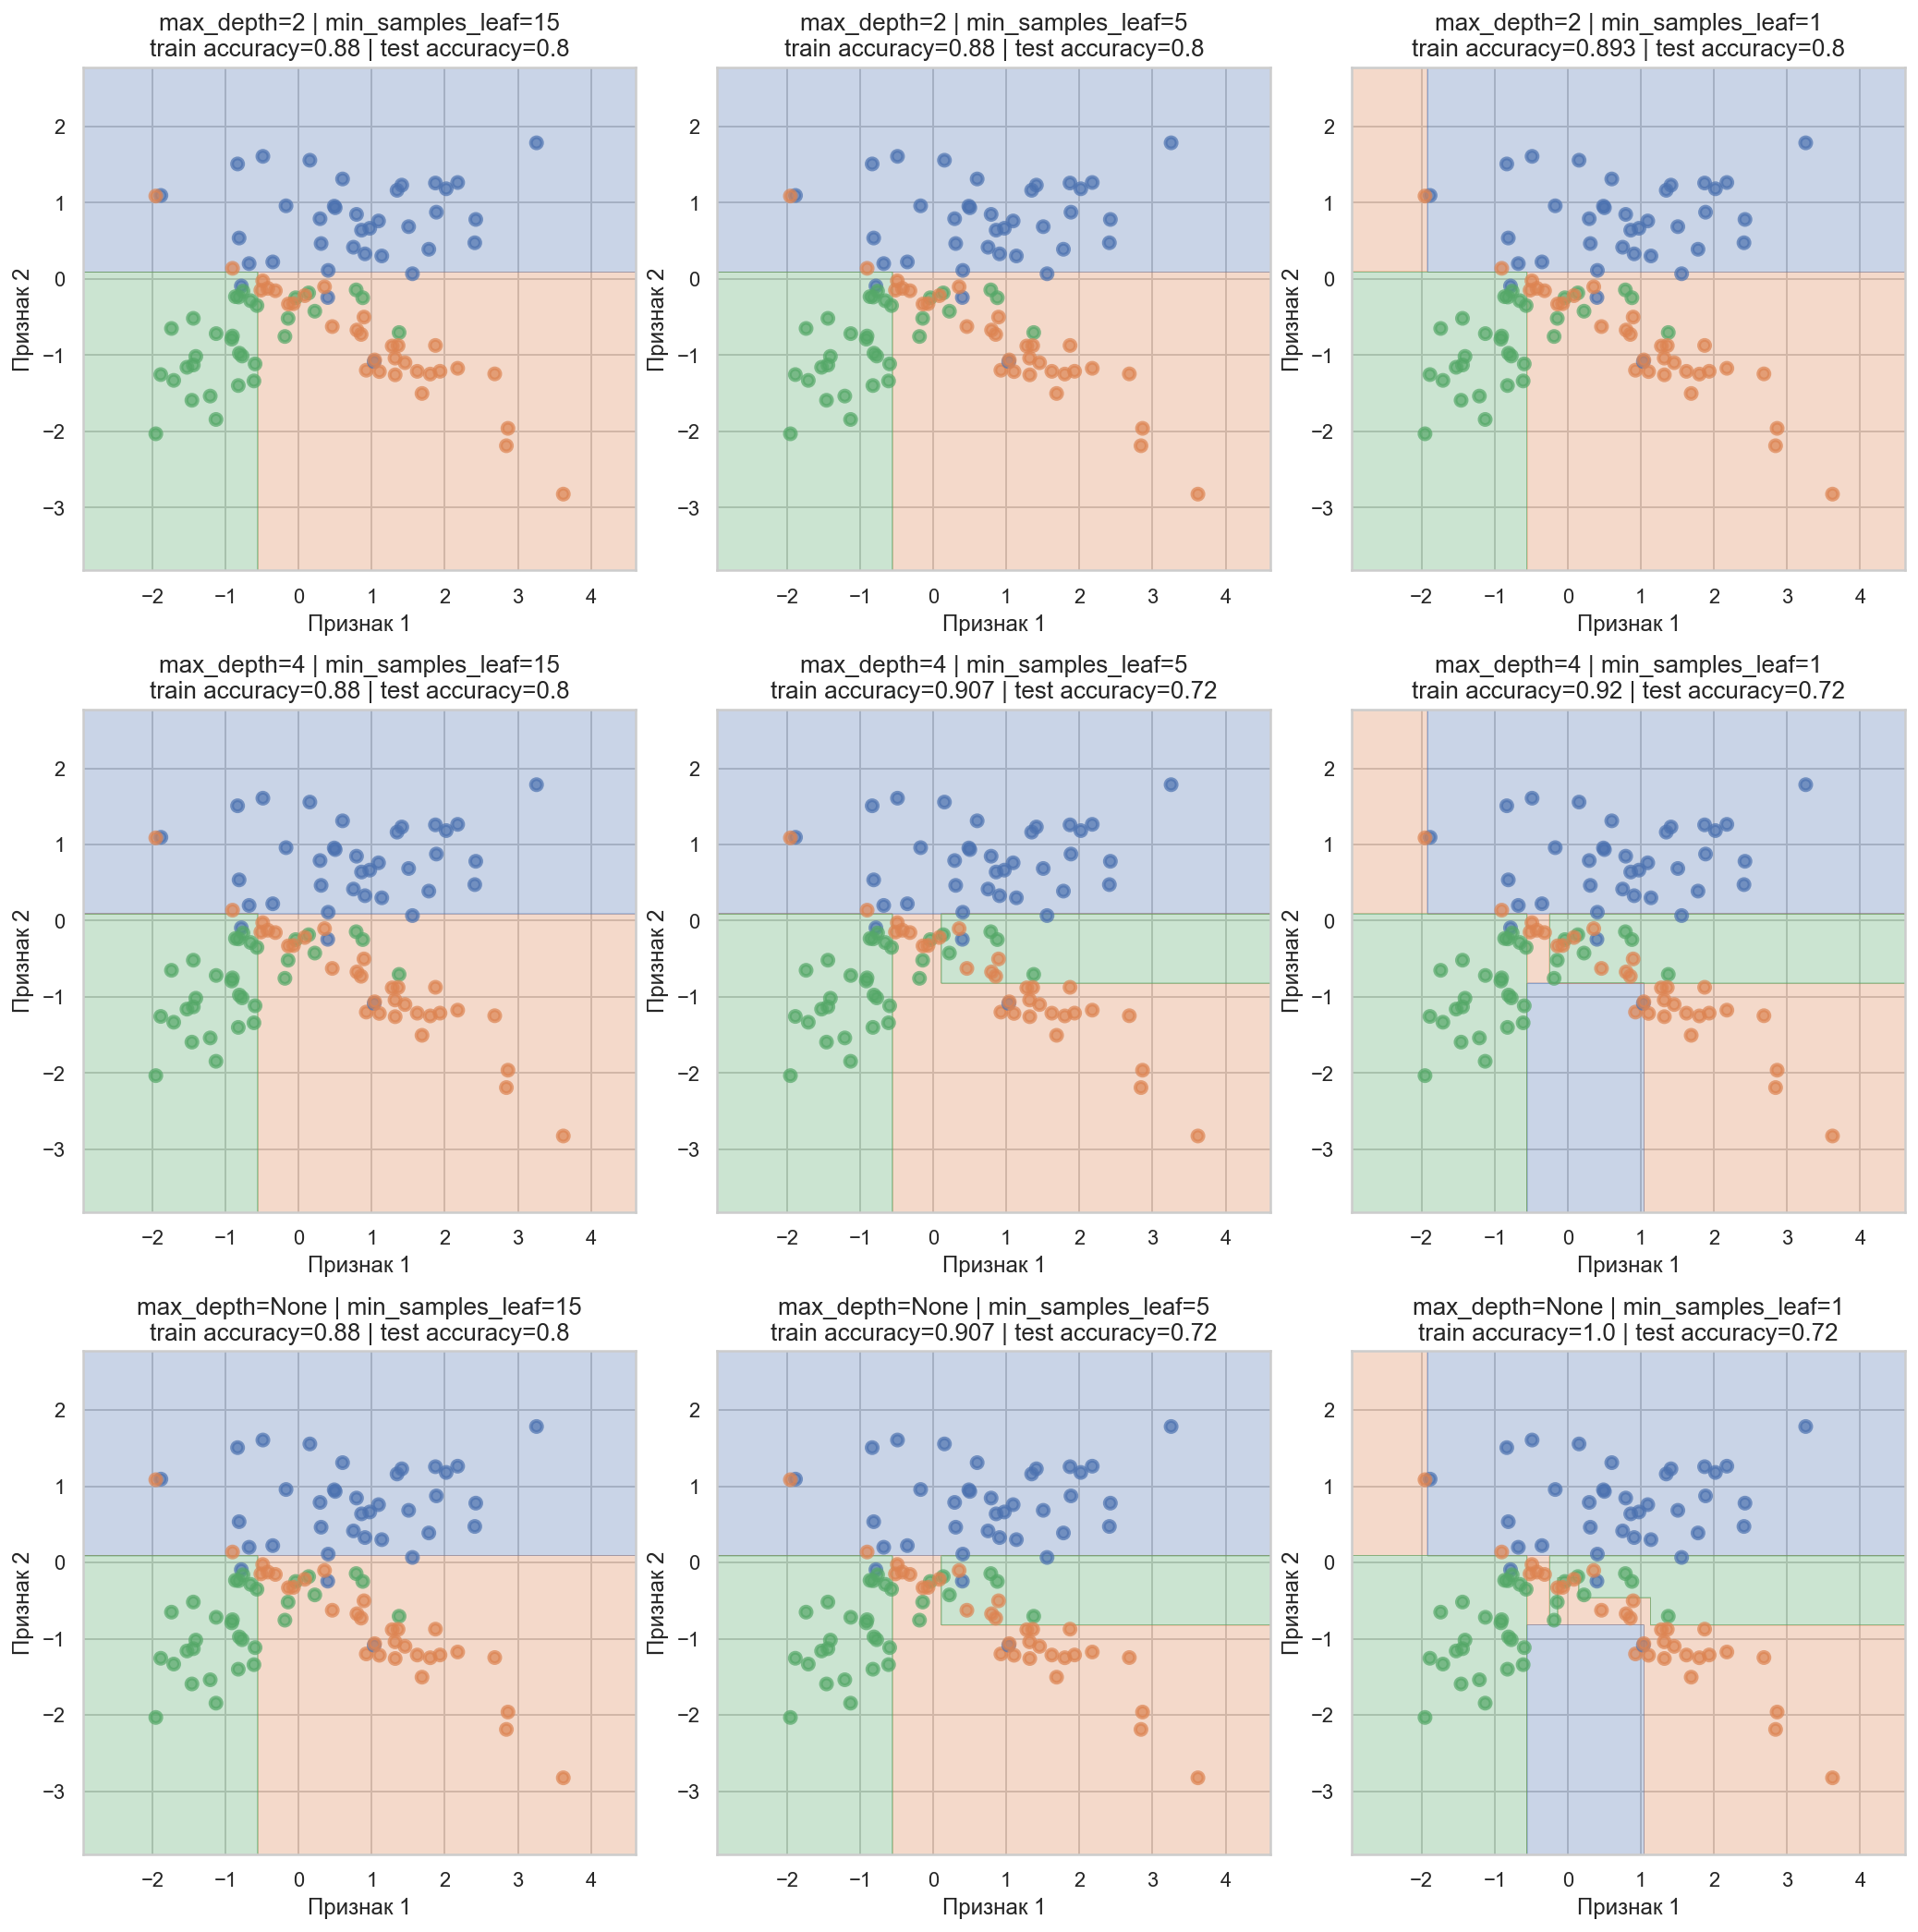

In [10]:
print('Датасет 3: 3 класса')
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # test_size=0.25 по дефолту

plt.figure(figsize=(15, 15))

for i, max_depth in enumerate([2, 4, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        test_accuracy = model.score(X_test, y_test)
        train_accuracy = model.score(X_train, y_train)
        
        plt.subplot(3, 3, i * 3 + j + 1)
        plot_surface(model, X, y)
        plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf)
                  + '\ntrain accuracy=' + str(round(train_accuracy, 3))
                  + ' | test accuracy=' + str(round(test_accuracy, 3)), fontsize=13)
        
        plt.xlabel('Признак 1')
        plt.ylabel('Признак 2')

<div class="alert alert-block alert-info">
<b>Три класса</b>
    
В этом примере важно строго ограничивать модель, иначе скор на трейне растет, на тесте стремительно падает.<br><br>

<b>Ответ:</b>
    
В среднем слишком строгие ограничения (15 объектов в листе, глубина 2) не дают модели вытащить нужную информацию. С послаблением ограничений, что логично, модели начинают запоминать все объекты, т. е. переобучаться.
</div>

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

<div class="alert alert-block alert-info">
<b><a href='https://contest.yandex.ru/contest/21899/run-report/41035951/'>ainurmkh</a></b>
</div>

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [11]:
from hw5code import find_best_split

plt.rcParams['figure.figsize'] = 8, 5

df = pd.read_csv('/Users/ainurmukh/ml_1/students.csv')
X, y = df.drop(' UNS', axis=1), df[' UNS']

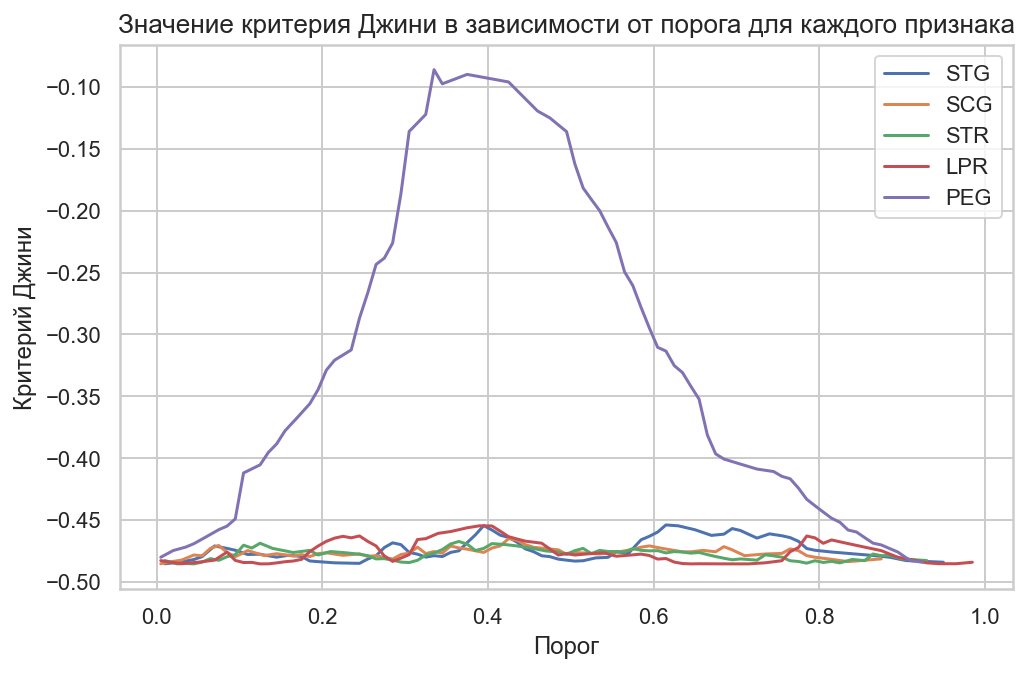

In [12]:
for col in X.columns:
    thresholds, ginis, _, _ = find_best_split(np.array(X[col]), np.array(y))
    plt.plot(thresholds, ginis, label=col)

plt.title('Значение критерия Джини в зависимости от порога для каждого признака', fontsize=13)
plt.xlabel('Порог')
plt.ylabel('Критерий Джини')
plt.legend();

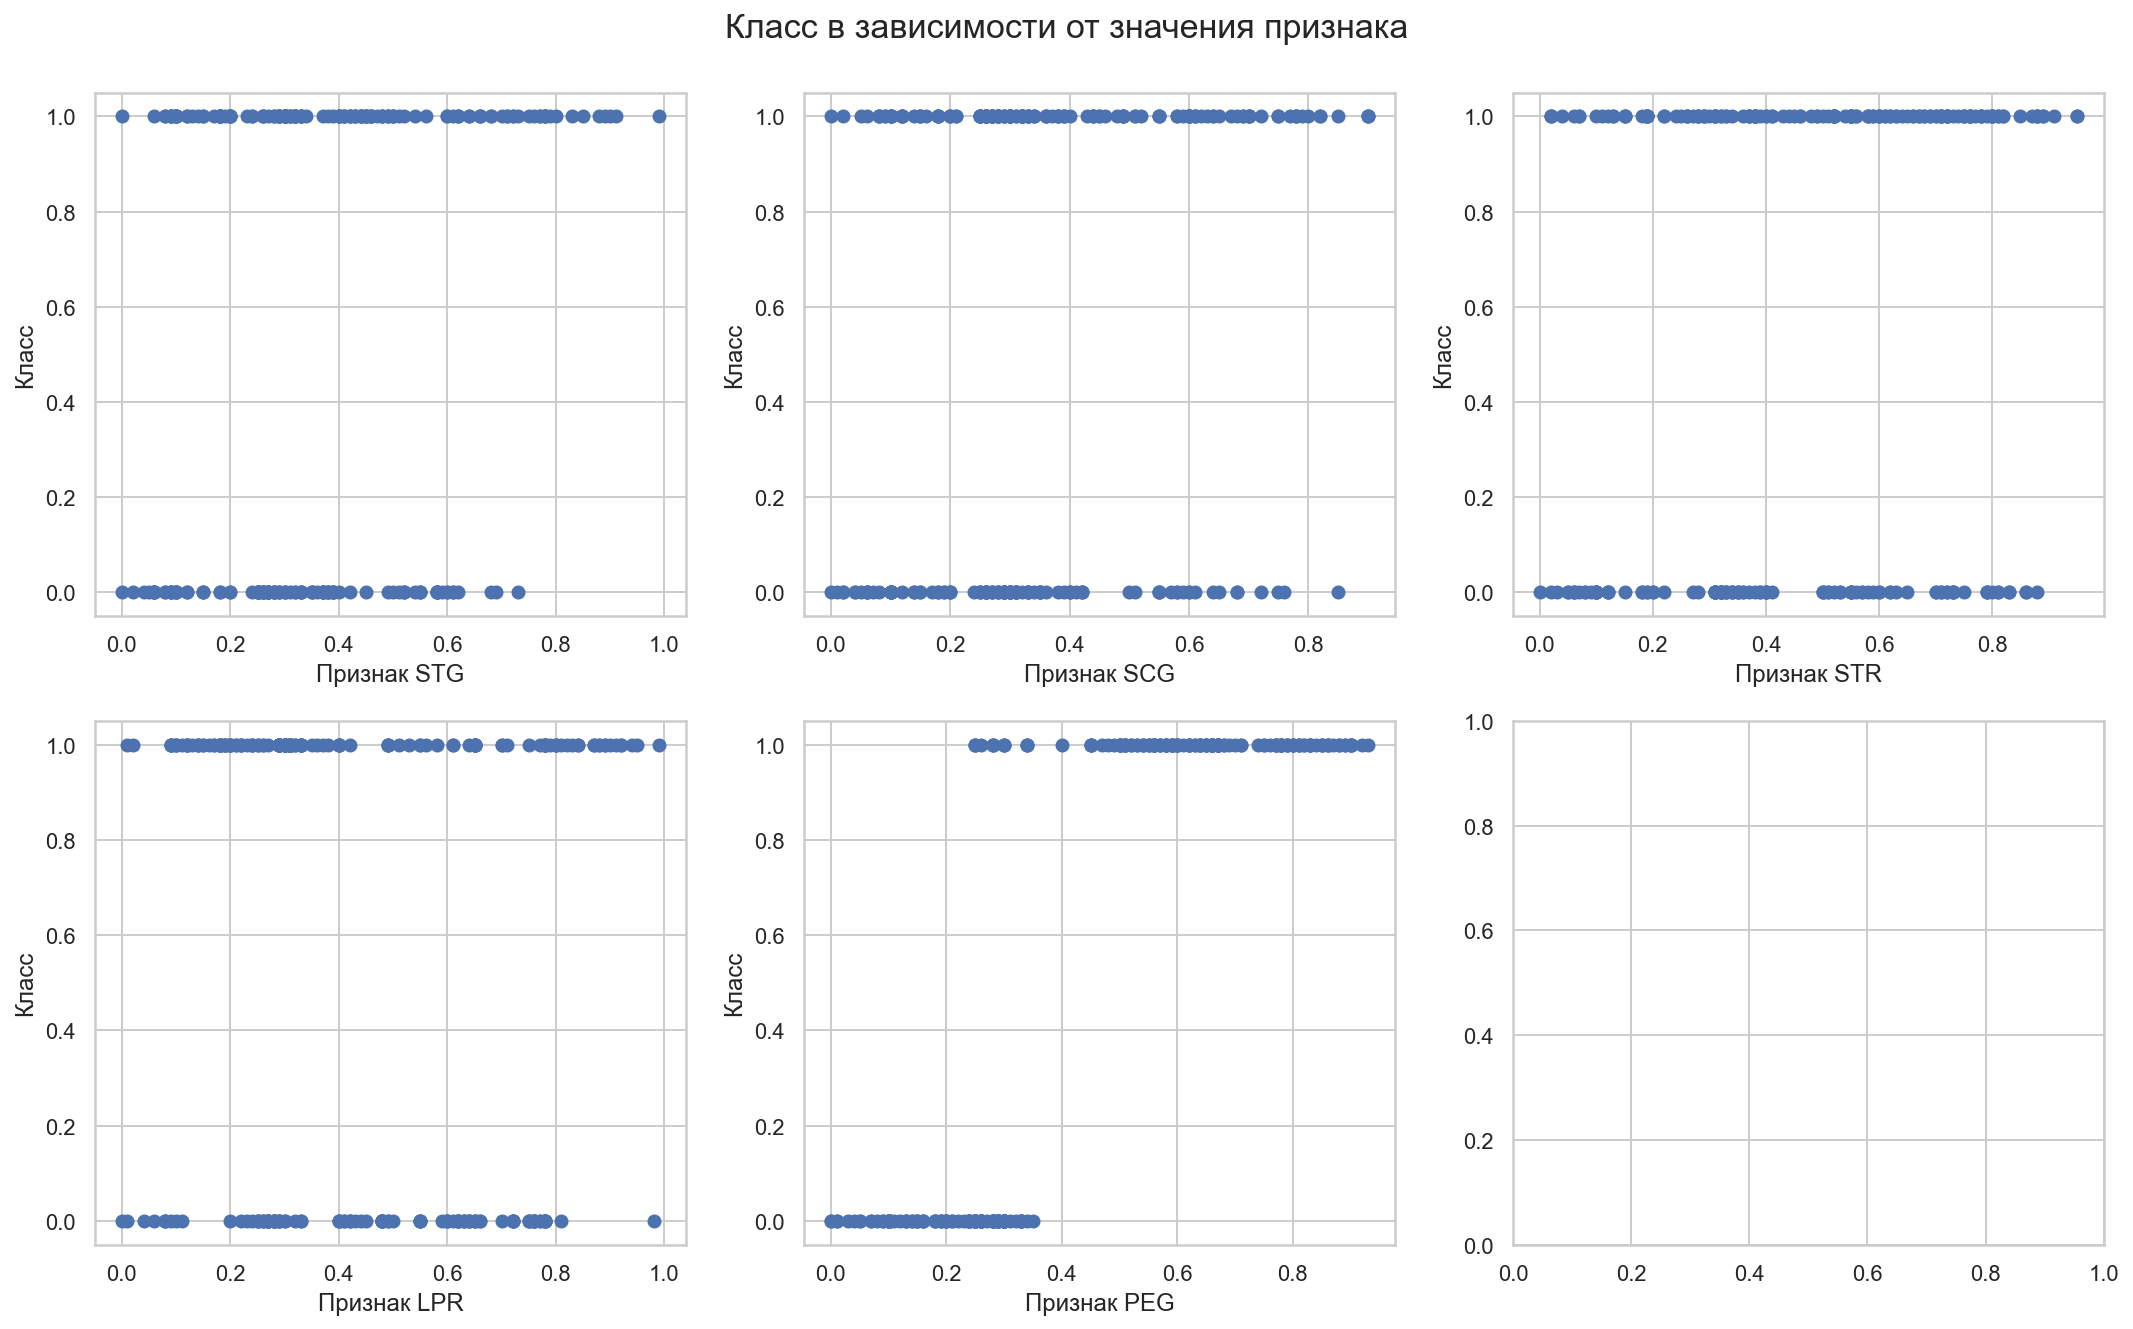

In [13]:
fig, plts = plt.subplots(2, 3)
plt.subplots_adjust(top=0.925)
fig.set_size_inches(18, 10)
fig.suptitle('Класс в зависимости от значения признака', fontsize=17)

for i, col in enumerate(X.columns):
    plts[i // 3][i % 3].scatter(X[col], y)
    plts[i // 3][i % 3].set_xlabel('Признак ' + col)
    plts[i // 3][i % 3].set_ylabel('Класс')

__Задание 5. (0.5 балла)__

<ol><li>Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева?
<li>Согласуется ли этот результат с визуальной оценкой scatter-графиков?
<li>Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?</ol>

<div class="alert alert-block alert-info">
<b>Ответ:</b>
    
<ol><li>Разбиение лучше производить по признаку <b>PEG</b>.
    <li>На scatter-графике видно, как значение признака PEG у объектов отрицательного класса не превышает 0.4, в то время как у большей части положительных объектов значение признака больше 0.4. Визуально заметный порог для разбиения также является лучшим судя по графику зависимости критерия Джини от значения признака.
    <li>Кривая критерия Джини имеет заметный максимум для хороших признаков. и держится на одном уровне для плохих. Impurity остается постоянным при разбиении по любому порогу.</ol>
</div>

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

<div class="alert alert-block alert-info">
<b><a href='https://contest.yandex.ru/contest/21899/run-report/41058525/'>ainurmkh</a></b>
</div>

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [14]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
df = pd.read_csv('agaricus-lepiota.data', sep=',')

--2020-11-16 13:26:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)… 128.195.10.252
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 373704 (365K) [application/x-httpd-php]
Сохранение в: «agaricus-lepiota.data»

agaricus-lepiota.da 100%[===================>] 364,95K   116KB/s    за 3,1s    

2020-11-16 13:26:52 (116 KB/s) - «agaricus-lepiota.data» сохранён [373704/373704]



In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('p', axis=1), df['p'] == 'e', test_size=0.5,
                                                    random_state=42)

In [16]:
from hw5code import DecisionTree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

encoder = OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

model = DecisionTree(['categorical'] * X_train.shape[1])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy =', round(accuracy_score(y_test, y_pred), 5))

Accuracy = 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [17]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data
df_tic = pd.read_csv('tic-tac-toe.data', sep=',')
X, y = encoder.fit_transform(df_tic.drop('positive', axis=1)), df_tic['positive'] == 'positive'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

--2020-11-16 13:26:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)… 128.195.10.252
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 25866 (25K) [application/x-httpd-php]
Сохранение в: «tic-tac-toe.data»

tic-tac-toe.data    100%[===================>]  25,26K  91,5KB/s    за 0,3s    

2020-11-16 13:26:54 (91,5 KB/s) - «tic-tac-toe.data» сохранён [25866/25866]



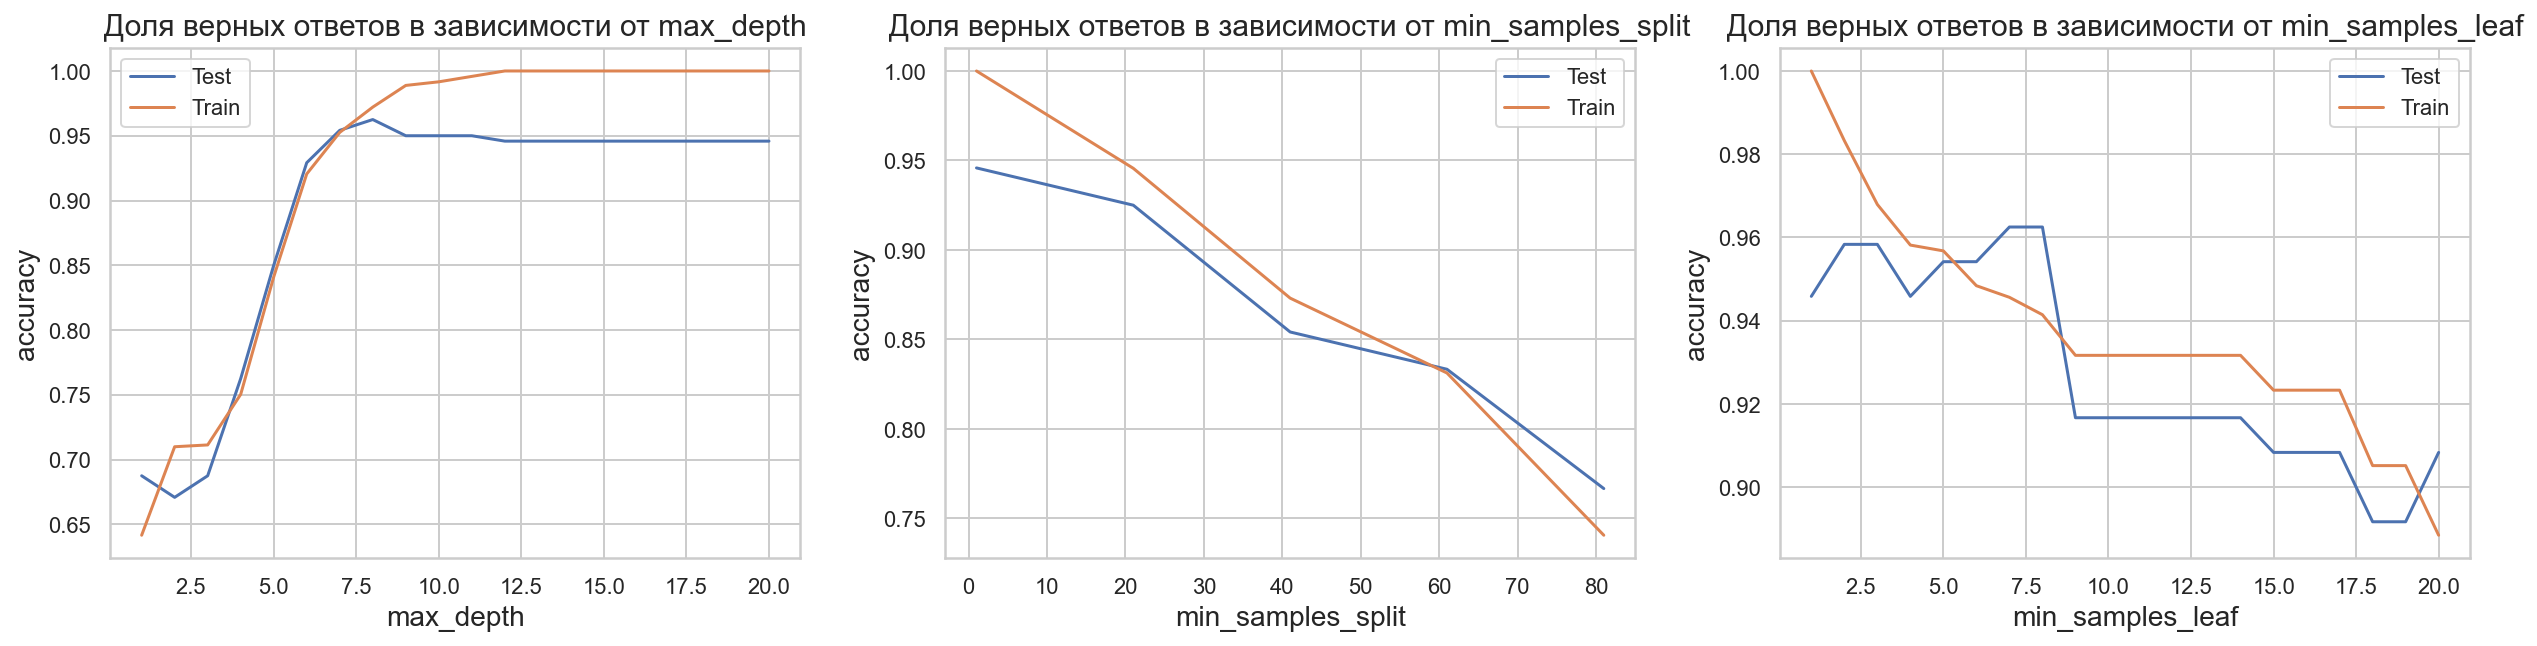

In [18]:
from collections import defaultdict

plt.figure(figsize=(18, 5))
plt.title('Качество предсказаний модели в зависимости от параметров')

params = {'max_depth': range(1, 21),
          'min_samples_split': range(1, 100, 20),
          'min_samples_leaf': range(1, 21)}

results = defaultdict(list)

for i, (param, values) in enumerate(params.items()):
    for param_value in values:
        model = DecisionTree(['categorical'] * X_train.shape[1],
                             max_depth=[None, param_value][param == 'max_depth'],
                             min_samples_split=[None, param_value][param == 'min_samples_split'],
                             min_samples_leaf=[None, param_value][param == 'min_samples_leaf'])
        model.fit(X_train, y_train)
        
        results[param].append(
            (accuracy_score(y_test, model.predict(X_test)), accuracy_score(y_train, model.predict(X_train)))
        )
    
    plt.subplot(1, 3, i + 1)
    plt.plot(values, np.array(results[param])[:, 0], label='Test')
    plt.plot(values, np.array(results[param])[:, 1], label='Train')
    plt.title('Доля верных ответов в зависимости от ' + param, fontsize=15)
    plt.xlabel(param, fontsize=14)
    plt.ylabel('accuracy', fontsize=14)
    plt.tight_layout(w_pad=0.5, pad=2.5)
    plt.legend();

<div class="alert alert-block alert-info">
тайтлы графиков не слишком мелкие? у меня глаз замылился, сама не пойму
</div>

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [19]:
X, y, result = [None] * 4 , [None] * 4, defaultdict(list)
X[0], y[0] = encoder.fit_transform(df.drop('p', axis=1)), df['p'] == 'e'

X[1], y[1] = encoder.fit_transform(df_tic.drop('positive', axis=1)), df_tic['positive'] == 'positive'

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
df = pd.read_csv('car.data', sep=',')
X[2], y[2] = encoder.fit_transform(df.drop('unacc',axis=1)), df['unacc'].replace(['unacc', 'acc', 'good', 'vgood'],
                                                                                  [0, 0, 1, 1])

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data
df = pd.read_csv('nursery.data', sep=',')
X[3] = encoder.fit_transform(df.drop('recommend', axis=1))
y[3] = 1 - df['recommend'].isin({'not_recom', 'recommend'})

--2020-11-16 13:26:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)… 128.195.10.252
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 51867 (51K) [application/x-httpd-php]
Сохранение в: «car.data»

car.data            100%[===================>]  50,65K  73,4KB/s    за 0,7s    

2020-11-16 13:27:00 (73,4 KB/s) - «car.data» сохранён [51867/51867]

--2020-11-16 13:27:01--  https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)… 128.195.10.252
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 1059371 (1,0M) [application/x-httpd-php]
Сохранение в: «nursery.data»

nursery.data        100%[===================>]   1,01M  94,

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

for X_, y_ in zip(X, y):
    model = DecisionTree(['real'] * X_.shape[1])
    
    accuracy = np.mean(cross_val_score(model, X_, y_, scoring=make_scorer(accuracy_score), cv=10, n_jobs=1))
    result['DecisionTree \'real\''].append(accuracy)

In [21]:
for X_, y_ in zip(X, y):
    model = DecisionTree(['categorical'] * X_.shape[1])
    
    accuracy = np.mean(cross_val_score(model, X_, y_, scoring=make_scorer(accuracy_score), cv=10))
    result['DecisionTree \'categorical\''].append(accuracy)

In [22]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

for X_, y_ in zip(X, y):
    X_ = encoder.fit_transform(X_)
    model = DecisionTree(['real'] * X_.shape[1])
    
    accuracy = np.mean(cross_val_score(model, X_, y_, scoring=make_scorer(accuracy_score), cv=10))
    result['DecisionTree \'real + OHE\''].append(accuracy)

In [23]:
model = DecisionTreeClassifier()

for X_, y_ in zip(X, y):
    X_ = encoder.fit_transform(X_)
    
    accuracy = np.mean(cross_val_score(model, X_, y_, scoring=make_scorer(accuracy_score), cv=10))
    result['DecisionTreeClassiefier'].append(accuracy)

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

In [24]:
print('Результаты эксперимента:')
result = pd.DataFrame(result, index=['mushrooms', 'tic-tac-toe', 'cars', 'nursery'])
result.loc['mean'] = result.mean()
result.loc['mean w/o tic-tac-toe'] = result.loc[['mushrooms', 'cars', 'nursery']].mean()
result

Результаты эксперимента:


,DecisionTree 'real',DecisionTree 'categorical',DecisionTree 'real + OHE',DecisionTreeClassiefier
mushrooms,0.999261,1.000000,0.999631,0.968388
tic-tac-toe,0.462697,0.549265,0.553520,0.824583
cars,0.942600,0.967519,0.921767,0.832787
nursery,0.999846,0.999923,0.999769,0.999769
mean,0.851101,0.879177,0.868671,0.906382
mean w/o tic-tac-toe,0.980569,0.989147,0.973722,0.933648


<div class="alert alert-block alert-info">
<b>Ответ:</b>
<ul><li><b>DecisionTree</b> с обработкой признаков как <b>категориальных</b> работает лучше всех на всех данных за исключением tic-tac-toe. Что, на мой взгляд, логично и ожидаемо, поскольку признаки в таблицах либо все либо большинство являются категориальными.
    <li><b>DecisionTree</b> с OneHotEncoding и <b>DecisionTree</b>, обрабатывающие признаки как <b>вещественные</b> дают близкие результаты, но OneHotEncoding усложняет без лишней необходимости на то модель и в среднем (без tic-tac-toe) показывает результаты несколько хуже.
    <li><b>DecisionTreeClassifier</b> дает стабильно высокие результаты на всех данных, но намного ниже без tic-tac-toe, поскольку я подаю признаки уже OneHot-закодированные</ul>
</div>

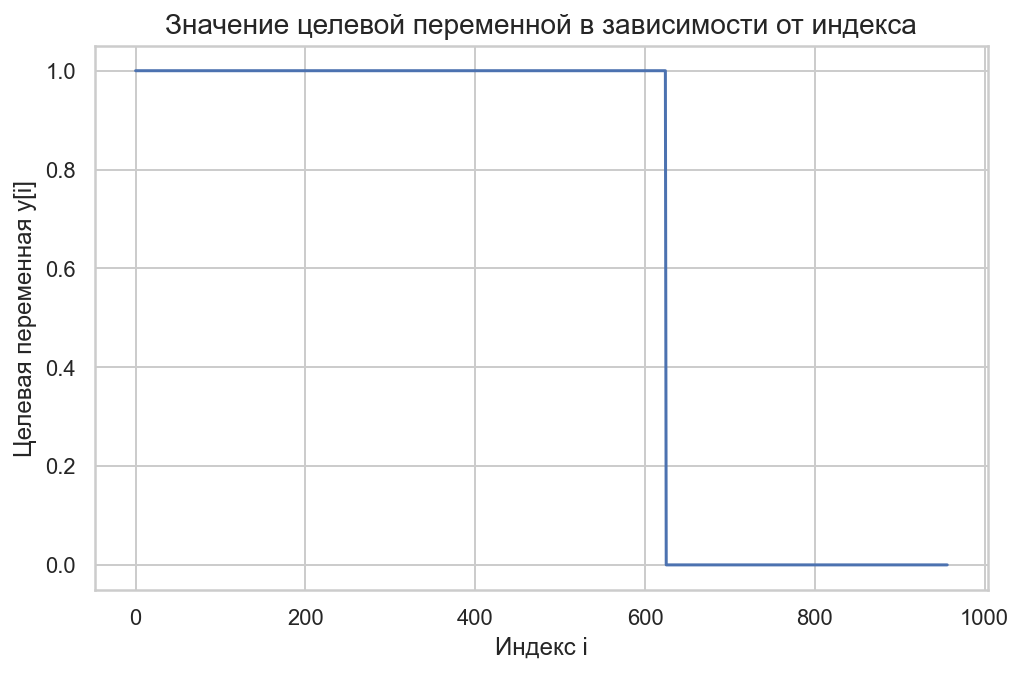

In [25]:
plt.plot(np.arange(y[1].size), y[1])
plt.title('Значение целевой переменной в зависимости от индекса', fontsize=14)
plt.xlabel('Индекс i')
plt.ylabel('Целевая переменная y[i]');

<div class="alert alert-block alert-info">
В векторе значений целевой переменной первые ~600 значений – 1, остальные – 0. Модель в кросс-валидации получает не все значения, местами получается сильный дисбаланс классов и она, соответственно, учится плохо.<br>
    
Попробуем перемешать объекты так, чтобы классы были распределены сбалансированно
</div>

In [26]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True)

accuracy = []
X1 = encoder.fit_transform(X[1])
models = [DecisionTree(['real'] * X[1].shape[1]), DecisionTree(['categorical'] * X[1].shape[1]),
          DecisionTree(['real'] * X1.shape[1]), DecisionTreeClassifier()]

for i in range(4):
    if i == 2:
        X[1] = X1
    accuracy.append(np.mean(
        cross_val_score(models[i], X[1], y[1], scoring=make_scorer(accuracy_score), cv=kfold, n_jobs=1)
    ))

In [27]:
result.loc['stratified tic-tac-toe'] = accuracy
result

,DecisionTree 'real',DecisionTree 'categorical',DecisionTree 'real + OHE',DecisionTreeClassiefier
mushrooms,0.999261,1.000000,0.999631,0.968388
tic-tac-toe,0.462697,0.549265,0.553520,0.824583
cars,0.942600,0.967519,0.921767,0.832787
nursery,0.999846,0.999923,0.999769,0.999769
mean,0.851101,0.879177,0.868671,0.906382
mean w/o tic-tac-toe,0.980569,0.989147,0.973722,0.933648
stratified tic-tac-toe,0.888257,0.944638,0.963443,0.948816


<div class="alert alert-block alert-info">
Улучшения видны во всех случаях. <b>DecisionTree</b> с параметром feature_type = <b>categorical</b> по прежнему дает лучшие результаты.
</div>

Вставьте что угодно, описывающее ваши впечатления от этого задания:

<img src='https://sun9-63.userapi.com/8kPZrd7-XjIezfkgH_lGfgOIqO76IxfES9x0rA/3KYfRDtyk1I.jpg' width='600'>